### working with Lemmatization and Stemming Techniques

 **Stemming Technique is technique of reducing the word to its root word (stem)**

**Eg: Running -> run, Eating -> eat, eaten -> eat**

#### Rule Based Stemming | Porter Stemmer

In [1]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
print(ps.stem('running'))

run


#### Dictionary Based : Different Forms of verbs have different key but stem word remains same

In [2]:
dictionary = {'running':'run','ran':'run','runner':'run'}
word = 'running'
print(dictionary.get(word,word))

run


#### Corpus Based Stemming Technique

**It will pick up the word on the basis of the frequency**

In [3]:
forms = {'run':50,'running':30,'ran':20}
stem =  max(forms,key=forms.get)
print(stem)

run


#### Hybrid Stemming Technique : Prefined Technique with Custom


**Predefined**

In [4]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

**Custom Technique**

In [5]:
dictionary = {'running':'run'}
word = 'running'

In [6]:
print(dictionary.get(word,word))

run


#### Merging Both Predefined Algorithm + Customer Technique = Hybrid Stemming

In [7]:
if word in dictionary:
    stem = dictionary[word]
else:
    stem = ps.stem(word)
print(stem)

run


#### Light Stemming Technique : we try to find stem word on basis of some prefix or suffix

**suffix : post of the word**
**prefix : pre of the word**

In [8]:
suffix = "ing"

In [9]:
l = len(suffix)

In [10]:
print(l)

3


In [11]:
word = input('Enter the word:')
if word.endswith(suffix):
   stem = word[:l]
else:
    stem = word
print('Light Stemming:',stem)

Enter the word: eating


Light Stemming: eat


In [12]:
word = input('Enter the word:')
if word.endswith(suffix):
   stem = word[:l]
else:
    stem = word
print('Light Stemming:',stem)

Enter the word: running


Light Stemming: run


#### Langauge-specific Morphological Stemming (Hindi Example)

**running -> Hindi form -> chalna**

**Indicnlp used for Hindi NLP Techniques :
https://github.com/anoopkunchukuttan/indic_nlp_library**

In [13]:
word = "ladkiyon" # girls
suffix = "yon"
l = len(suffix)
stem = word[:-1*l] if word.endswith(suffix) else word
print(stem)

ladki


#### Stemming Algorithms 
 - Porter Stemmer
 - Snowball Stemmer
 - LanCaster Stemmer

**Example**
```word => running => Porter => run, snowball => run,lancaster=> run 
flies => porter => fli => fli => fli 
happily => happili => happi => happy 
fishing => fish => fish => fish
better => better => better => bet

In [14]:
from nltk.stem import PorterStemmer,SnowballStemmer,LancasterStemmer

In [15]:
ps = PorterStemmer()
sb = SnowballStemmer('english') # Snowball stemmer takes english as langauge
lc = LancasterStemmer()

In [16]:
words = ['running','flies','happily','fishing','better']
print(f" {'word':<20} {'Porter':<20} {'Snowball':<20} {'Lancaster':<20}")
print("-"*80)

 word                 Porter               Snowball             Lancaster           
--------------------------------------------------------------------------------


In [17]:
print(f" {'word':<20} {'Porter':<20} {'Snowball':<20} {'Lancaster':<20}")
print("-"*80)
## use for loop to print the output
for w in words:
    print(f" {w:<20} {ps.stem(w):<20} {sb.stem(w):<20} {lc.stem(w):<20}")
print("-"*80)

 word                 Porter               Snowball             Lancaster           
--------------------------------------------------------------------------------
 running              run                  run                  run                 
 flies                fli                  fli                  fli                 
 happily              happili              happili              happy               
 fishing              fish                 fish                 fish                
 better               better               better               bet                 
--------------------------------------------------------------------------------


Problem with Stemming technique, is some algorithm work very fine for few words but for few words
it do not work hence we must go more advance nlp technique which is called **Lemmatization**.

#### Lemmatization Technique 

In [2]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Imart\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
lemmatizer = WordNetLemmatizer()
print(lemmatizer.lemmatize('running',pos='v'))

run


In [4]:
lemmatizer = WordNetLemmatizer()
print(lemmatizer.lemmatize('happily',pos='v'))

happily


#### POS => Part of Speech

1. verb => pos => v
2. adverb => pos =>r
3. adjective => a
4. noun => n


#### Lemmatization Technique with POS

In [7]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [8]:
words = [('running','v'),('happily','r'),('better','a'),('geese','n'),('mice','n'),('congratulations','n'),('happiest','a')]

In [9]:
print(words)

[('running', 'v'), ('happily', 'r'), ('better', 'a'), ('geese', 'n'), ('mice', 'n'), ('congratulations', 'n'), ('happiest', 'a')]


In [10]:
for word,pos in words:
    lemma = lemmatizer.lemmatize(word,pos=pos)
    print(f'word = {word} {pos} => {lemma}')

word = running v => run
word = happily r => happily
word = better a => good
word = geese n => goose
word = mice n => mouse
word = congratulations n => congratulation
word = happiest a => happy


#### Postagging is called part of speech

**postagging can be used ofr Morphological(many forms) and Lexical Analysis.**

In [2]:
import nltk

#### in order to use POS Tagging we use averaged_perceptron_tagger 

In [3]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Imart\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [4]:
from nltk import word_tokenize
tags = nltk.pos_tag(word_tokenize("Sunny Said Love you awnish hence awnish started dancing"))
print(tags)

[('Sunny', 'NNP'), ('Said', 'NNP'), ('Love', 'NNP'), ('you', 'PRP'), ('awnish', 'JJ'), ('hence', 'RB'), ('awnish', 'JJ'), ('started', 'VBD'), ('dancing', 'VBG')]


"The" is tagged as determiner (DT)
"quick" is tagged as adjective (JJ)
"brown" is tagged as adjective (JJ)
"fox" is tagged as noun (NN)
"jumps" is tagged as verb (VBZ)
"over" is tagged as preposition (IN)
"the" is tagged as determiner (DT)
"lazy" is tagged as adjective (JJ)
"dog" is tagged as noun (NN)

#### Named Entity Recognition

**it is used to detect people, organisation and locations : Generate Parse Trees on Name Entity**

In [5]:
from nltk import word_tokenize
tags = nltk.pos_tag(word_tokenize("Sunny Said Love you awnish hence awnish started dancing"))
print(tags)

[('Sunny', 'NNP'), ('Said', 'NNP'), ('Love', 'NNP'), ('you', 'PRP'), ('awnish', 'JJ'), ('hence', 'RB'), ('awnish', 'JJ'), ('started', 'VBD'), ('dancing', 'VBG')]


In [14]:
import nltk
nltk.download('maxent_ne_chunker_tab')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     C:\Users\Imart\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Imart\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.


True

In [6]:
from nltk import ne_chunk

In [8]:
tree = ne_chunk(tags)
tree.draw()

#### chunking => context Free Grammer => format => meaning information

In [13]:
from nltk import RegexpParser

In [15]:
grammer = "NP:{<DT>?<JJ>*<NN>}"
cp = RegexpParser(grammer)
result = cp.parse(tags)
result.draw()

#### Probability and Language Modeling

In [3]:
from nltk import word_tokenize

words = word_tokenize("Sunny Said Love you awnish hence awnish started dancing")

from nltk.probability import FreqDist
fdist = FreqDist(words)

#### Plotting the distribution

In [4]:
import matplotlib

<Axes: xlabel='Samples', ylabel='Counts'>

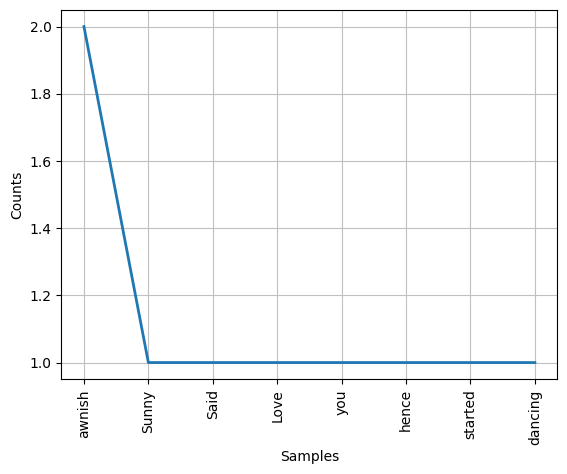

In [5]:
fdist.plot(10)